In [ ]:
import numpy as np
import torch
import torchvision
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train_data=datasets.MNIST(root='./data',download=
                       True,train=True,transform=transforms.ToTensor())
test_data=datasets.MNIST(root='./data',download=True,train=False,transform=transforms.ToTensor())



train_loader=torch.utils.data.DataLoader(train_data,shuffle=
                                               True,batch_size=32)
test_loader=torch.utils.data.DataLoader(test_data,shuffle=False,batch_size=32)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:02<00:00, 4572167.00it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 134815.56it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1272249.57it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3317751.44it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



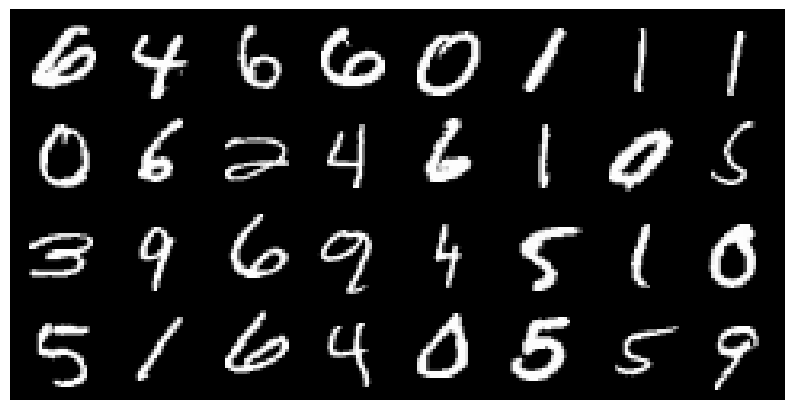

In [ ]:
images,labels=next(iter(train_loader))
grid_img=torchvision.utils.make_grid(images,nrow=8,padding=2)
plt.figure(figsize=(10,10))
plt.imshow(grid_img.permute(1,2,0))
plt.axis('off')
plt.show()



In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
train_data.targets.shape

torch.Size([60000])

In [ ]:
class cnn(nn.Module):
  def __init__(self):
    super(cnn,self).__init__()
    self.model=nn.Sequential(
      nn.Conv2d(1,10,kernel_size=(5,5)),  #1,28,28  --->10,24,24
      nn.Conv2d(10,20,kernel_size=(3,3)), #10,24,24 --->20,22,22
      nn.AvgPool2d(2,stride=2),           #20,22,22 --->20,11,11
      nn.Dropout())
    self.lin=nn.Sequential(
      nn.Linear(2420,80),   #20*11*11=2420
      nn.ReLU(),
      nn.Linear(80,10)

    )
  def forward(self,x):
    x=self.model(x)
    x=x.view(x.size(0),-1)
    x=self.lin(x)
    return x



In [ ]:
model=cnn()

In [ ]:
print(model)

cnn(
  (model): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Dropout(p=0.5, inplace=False)
  )
  (lin): Sequential(
    (0): Linear(in_features=2420, out_features=80, bias=True)
    (1): ReLU()
    (2): Linear(in_features=80, out_features=10, bias=True)
  )
)


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
model=model.to(device)

In [ ]:
criterion =  nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

 10%|█         | 1/10 [00:25<03:48, 25.43s/it]

Epoch [1/10], Train Loss: 0.2426, Test Loss: 0.1054, Train Acc: 96.87%, Test Acc: 96.87%


 20%|██        | 2/10 [00:49<03:16, 24.62s/it]

Epoch [2/10], Train Loss: 0.1218, Test Loss: 0.0906, Train Acc: 97.67%, Test Acc: 97.33%


 30%|███       | 3/10 [01:13<02:50, 24.38s/it]

Epoch [3/10], Train Loss: 0.0995, Test Loss: 0.0759, Train Acc: 98.17%, Test Acc: 97.82%


 40%|████      | 4/10 [01:37<02:24, 24.16s/it]

Epoch [4/10], Train Loss: 0.0858, Test Loss: 0.0796, Train Acc: 98.08%, Test Acc: 97.54%


 50%|█████     | 5/10 [02:00<01:59, 23.83s/it]

Epoch [5/10], Train Loss: 0.0808, Test Loss: 0.0741, Train Acc: 98.36%, Test Acc: 97.70%


 60%|██████    | 6/10 [02:23<01:34, 23.63s/it]

Epoch [6/10], Train Loss: 0.0706, Test Loss: 0.0736, Train Acc: 98.64%, Test Acc: 97.80%


 70%|███████   | 7/10 [02:48<01:11, 23.99s/it]

Epoch [7/10], Train Loss: 0.0667, Test Loss: 0.0705, Train Acc: 98.75%, Test Acc: 98.00%


 80%|████████  | 8/10 [03:12<00:47, 23.91s/it]

Epoch [8/10], Train Loss: 0.0645, Test Loss: 0.0710, Train Acc: 98.72%, Test Acc: 97.96%


 90%|█████████ | 9/10 [03:36<00:23, 23.97s/it]

Epoch [9/10], Train Loss: 0.0587, Test Loss: 0.0611, Train Acc: 99.07%, Test Acc: 98.26%


100%|██████████| 10/10 [04:00<00:00, 24.03s/it]

Epoch [10/10], Train Loss: 0.0572, Test Loss: 0.0610, Train Acc: 99.07%, Test Acc: 98.30%


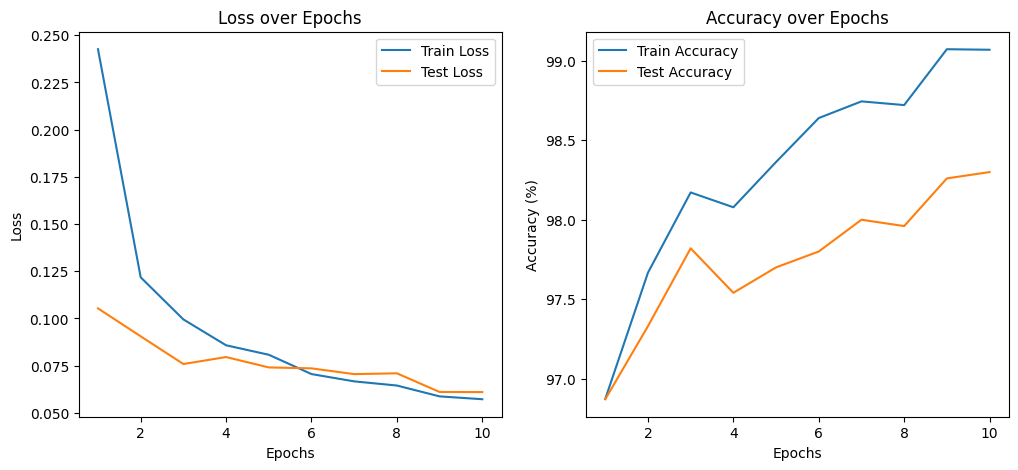

In [ ]:

train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
num_epochs=10

# Function to calculate accuracy
def calculate_accuracy(loader, model):
    model.eval()  # Evaluation mode
    correct = total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training and validation loop
for epoch in tqdm(range(num_epochs)):
    model.train()  # Training mode
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Calculate accuracy for train and test sets
    train_accuracy = calculate_accuracy(train_loader, model)
    test_accuracy = calculate_accuracy(test_loader, model)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate test loss
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, '
          f'Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%')

# Plot losses and accuracies
epochs = np.arange(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

In [ ]:
torch.save(model.state_dict(), 'digit_classification.pth')

# Download the saved model to your local machine (Optional)
from google.colab import files
files.download('digit_classification.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>